You work for a consumer finance company which specializes in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision: 
• If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company 
• If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default. 

When a person applies for a loan, there are two types of decisions that could be taken by the company: 
1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below: 
o Fully paid: Applicant has fully paid the loan (the principal and the interest rate) 
o Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'. 
o Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan  
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through an online interface.  
 Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.  
 If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
 In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment.  
Perform Multinomial regression on the dataset in which loan_status is the output (Y) variable and it has three levels in it.


**Business Objective :- To check for the loan status for the consumer**

In [1]:
#lets load the required libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#lets load the data set
loan = pd.read_csv("/content/loan.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan.head(5)

id  member_id  ...  total_bc_limit  total_il_high_credit_limit
0  1077501    1296599  ...             NaN                         NaN
1  1077430    1314167  ...             NaN                         NaN
2  1077175    1313524  ...             NaN                         NaN
3  1076863    1277178  ...             NaN                         NaN
4  1075358    1311748  ...             NaN                         NaN

[5 rows x 111 columns]

In [4]:
loan.describe()

id     member_id  ...  total_bc_limit  total_il_high_credit_limit
count  3.971700e+04  3.971700e+04  ...             0.0                         0.0
mean   6.831319e+05  8.504636e+05  ...             NaN                         NaN
std    2.106941e+05  2.656783e+05  ...             NaN                         NaN
min    5.473400e+04  7.069900e+04  ...             NaN                         NaN
25%    5.162210e+05  6.667800e+05  ...             NaN                         NaN
50%    6.656650e+05  8.508120e+05  ...             NaN                         NaN
75%    8.377550e+05  1.047339e+06  ...             NaN                         NaN
max    1.077501e+06  1.314167e+06  ...             NaN                         NaN

[8 rows x 87 columns]

In [5]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

As in the original given data, there are total 39717 observations and 111 variables. The detail of the data set is too large so not able to introduce all at once.

In [6]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#as the data set is very large lets drop all NA at once by column
loan = loan.dropna(axis = 1)

In [8]:
loan.info

<bound method DataFrame.info of             id  member_id  ...  acc_now_delinq  delinq_amnt
0      1077501    1296599  ...               0            0
1      1077430    1314167  ...               0            0
2      1077175    1313524  ...               0            0
3      1076863    1277178  ...               0            0
4      1075358    1311748  ...               0            0
...        ...        ...  ...             ...          ...
39712    92187      92174  ...               0            0
39713    90665      90607  ...               0            0
39714    90395      90390  ...               0            0
39715    90376      89243  ...               0            0
39716    87023      86999  ...               0            0

[39717 rows x 43 columns]>

In [9]:
#lets drop the insignificance variable columns
loan=loan.drop(['member_id', 'id','term','grade','sub_grade','home_ownership','int_rate',
                'verification_status','application_type' ,'issue_d', 'pymnt_plan','url','purpose','zip_code',
                'addr_state', 'earliest_cr_line', 'initial_list_status','initial_list_status'], axis=1)

In [10]:
#target variable
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

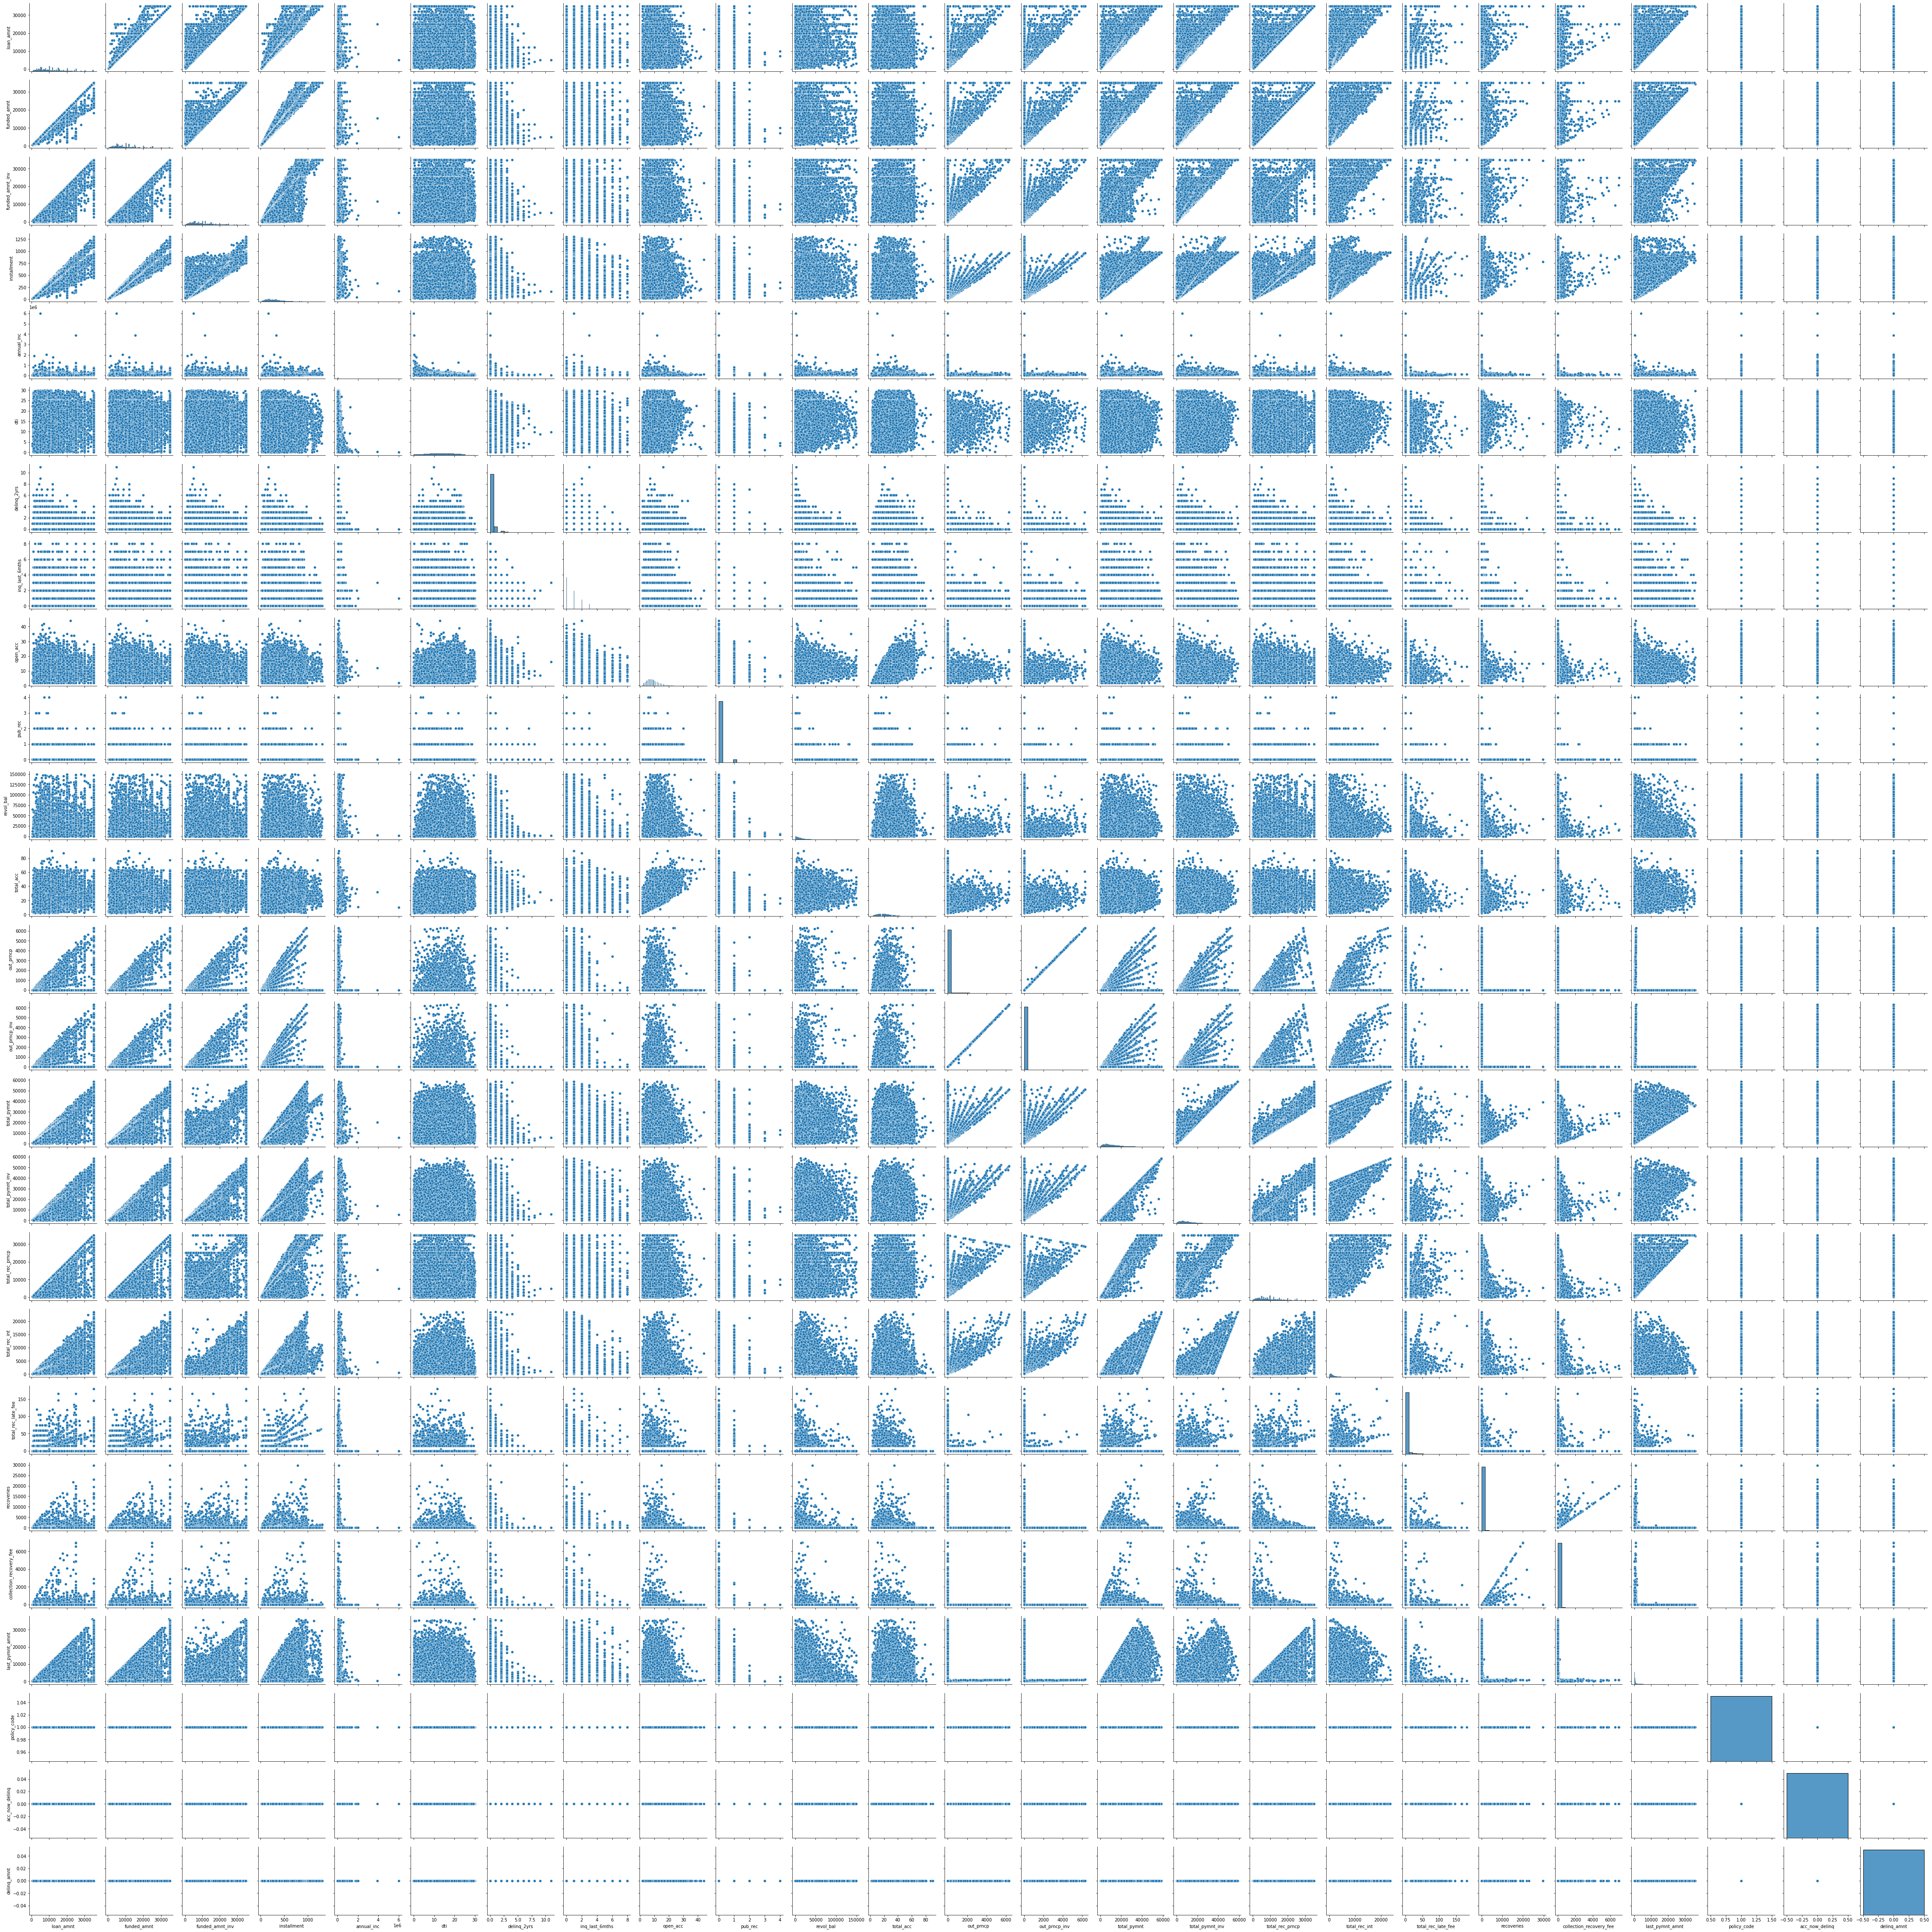

In [11]:
# Scatter plot between each possible pair of independent variable and also histogram for each independent variable 
sns.pairplot(loan) # Normal

In [12]:
# Correlation values between each independent features
loan.corr()

loan_amnt  funded_amnt  ...  acc_now_delinq  delinq_amnt
loan_amnt                 1.000000     0.981578  ...             NaN          NaN
funded_amnt               0.981578     1.000000  ...             NaN          NaN
funded_amnt_inv           0.940034     0.958422  ...             NaN          NaN
installment               0.930288     0.956159  ...             NaN          NaN
annual_inc                0.271149     0.266965  ...             NaN          NaN
dti                       0.066439     0.066283  ...             NaN          NaN
delinq_2yrs              -0.031864    -0.032355  ...             NaN          NaN
inq_last_6mths            0.009229     0.009259  ...             NaN          NaN
open_acc                  0.177168     0.175530  ...             NaN          NaN
pub_rec                  -0.051236    -0.052169  ...             NaN          NaN
revol_bal                 0.317597     0.310392  ...             NaN          NaN
total_acc                 0.256442     0.250589  ...             NaN          NaN
out_prncp                 0.192937     0.194941  ...             NaN          NaN
out_prncp_inv             0.192623     0.194675  ...             NaN          NaN
total_pymnt               0.886613     0.903160  ...             NaN          NaN
total_pymnt_inv           0.854243     0.870799  ...             NaN          NaN
total_rec_prncp           0.852021     0.870255  ...             NaN          NaN
total_rec_int             0.729726     0.737469  ...             NaN          NaN
total_rec_late_fee        0.044706     0.046705  ...             NaN          NaN
recoveries                0.135446     0.136284  ...             NaN          NaN
collection_recovery_fee   0.072853     0.074676  ...             NaN          NaN
last_pymnt_amnt           0.448742     0.453133  ...             NaN          NaN
policy_code                    NaN          NaN  ...             NaN          NaN
acc_now_delinq                 NaN          NaN  ...             NaN          NaN
delinq_amnt                    NaN          NaN  ...             NaN          NaN

[25 rows x 25 columns]

In [13]:
#lets split the data into train and test
train, test = train_test_split(loan, test_size = 0.2)

The model is build by taking the output as a loan status. So, the prediction is done over the loan_status variable. 

In [14]:
# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg").fit(train.iloc[:, 0:5], train.iloc[:, 5])

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [15]:
test_predict = model.predict(test.iloc[:, 0:5]) # Test predictions

In [16]:
# Test accuracy 
accuracy_score(test.iloc[:,5], test_predict)

0.8265357502517623

**Test Accuracy = 82.65%**

In [17]:
train_predict = model.predict(train.iloc[:, 0:5]) # Train predictions 

In [18]:
# Train accuracy 
accuracy_score(train.iloc[:,5], train_predict) 

0.8291945991879898

**Train Accuracy = 82.91%**